In [493]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as tts

In [398]:
Data=pd.read_csv('creditcard_data.csv')

In [399]:
Data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Age,Years_Working
0,5008838,M,N,Y,1,129820,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,3,-9,X,32,6
1,5008839,M,N,Y,1,129820,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,3,0,C,32,6
2,5008840,M,N,Y,1,129820,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,3,0,C,32,6
3,5008841,M,N,Y,1,129820,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,3,0,0,32,6
4,5008842,M,N,Y,1,129820,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,3,0,0,32,6


### Display the data types of each column using the attribute dtype 

In [400]:
Data.dtypes

ID                      int64
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN            int64
AMT_INCOME_TOTAL        int64
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS     object
NAME_HOUSING_TYPE      object
FLAG_MOBIL              int64
FLAG_WORK_PHONE         int64
FLAG_PHONE              int64
FLAG_EMAIL              int64
OCCUPATION_TYPE        object
CNT_FAM_MEMBERS         int64
MONTHS_BALANCE          int64
STATUS                 object
Age                     int64
Years_Working           int64
dtype: object

### Use the method value_counts to count the frequency of Name Income Type, use the method .to_frame () to convert it to a dataframe. 

In [401]:
Income_Type=Data.NAME_INCOME_TYPE.value_counts().to_frame()

In [402]:
Income_Type

,NAME_INCOME_TYPE
Working,1536
Commercial associate,1171
State servant,304
Pensioner,1


### Perform a statistical summary and analysis of Years_Working.  


In [403]:
Data['Years_Working'].describe()

count    3012.000000
mean        7.809097
std         6.018659
min         0.000000
25%         3.000000
50%         7.000000
75%        11.000000
max        35.000000
Name: Years_Working, dtype: float64

### Use the function boxplot in the seaborn library to produce a plot that can be used to show the Years_Working. 


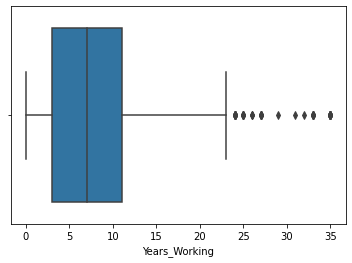

In [404]:
sns.boxplot(Data['Years_Working'])

### Removing Outliers

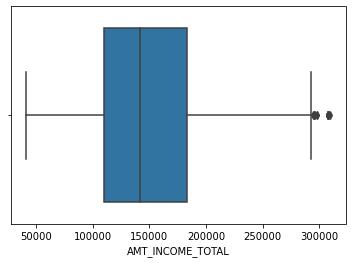

In [405]:
sns.boxplot(Data['AMT_INCOME_TOTAL'])

In [406]:
def outlier(col):
    IQR=Data[col].quantile(.75)-Data[col].quantile(.25)
    upper_bound=Data[col].quantile(.75) + ( 1.5 * IQR)
    lower_bound=Data[col].quantile(.25) - ( 1.5 * IQR)
    Data[col].clip(lower=lower_bound,upper=upper_bound,inplace=True)

In [407]:
outlier('AMT_INCOME_TOTAL')

In [408]:
outlier('Years_Working')

### Using one-hot encoding on  Categorical Variables

In [409]:
Categ_Data=pd.get_dummies(Data.select_dtypes('object'),drop_first=True)

In [410]:
Data.drop(Data.select_dtypes('object').columns.values.tolist(),axis=1,inplace=True)

In [411]:
Data=pd.concat([Data,Categ_Data],axis=1)

In [505]:
Data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,Age,...,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,STATUS_1,STATUS_2,STATUS_5,STATUS_C,STATUS_X
0,5008838,1,129820.0,1,0,0,0,3,-9,32,...,1,0,0,0,0,0,0,0,0,1
1,5008839,1,129820.0,1,0,0,0,3,0,32,...,1,0,0,0,0,0,0,0,1,0
2,5008840,1,129820.0,1,0,0,0,3,0,32,...,1,0,0,0,0,0,0,0,1,0
3,5008841,1,129820.0,1,0,0,0,3,0,32,...,1,0,0,0,0,0,0,0,0,0
4,5008842,1,129820.0,1,0,0,0,3,0,32,...,1,0,0,0,0,0,0,0,0,0


### Use the function regplot in the seaborn library to determine if the Age is negatively or positively correlated with the Annual Income. 


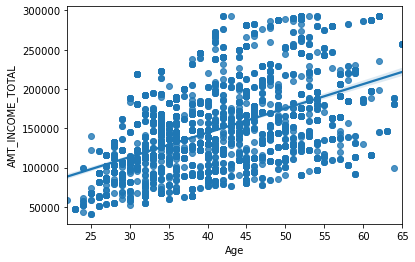

In [415]:
sns.regplot(Data.Age,Data.AMT_INCOME_TOTAL)

### Fit a linear regression model to predict the Years_Working against the annual income and then calculate R^2. Take a screenshot of your code and the value of the R^2. 

In [417]:
X=np.asarray(Data.Years_Working).reshape(-1,1)
y=np.asarray(Data.AMT_INCOME_TOTAL).reshape(-1,1)

In [420]:
lr=LR().fit(X,y)
Income_Pred=lr.predict(X)

In [423]:
r2_score(y,Income_Pred)

0.8961022098402632


### Make a distribution plot of actual and fitted values. Interpret the results.

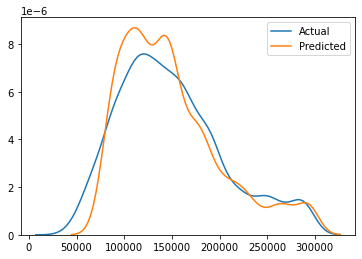

In [428]:
sns.distplot(y,hist=False,label="Actual")
sns.distplot(Income_Pred,hist=False,label='Predicted')

### Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2. Take a screenshot of your code and the R^2. 

In [470]:
X_cols=['MONTHS_BALANCE','Age','Years_Working','NAME_FAMILY_STATUS_Married','NAME_HOUSING_TYPE_Rented apartment']
y_col=['AMT_INCOME_TOTAL']

In [471]:
X_Data=Data[X_cols]
y=Data[y_col]

In [477]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LR())]

In [478]:
pipe=Pipeline(Input)

In [479]:
pipe.fit(X_Data,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [480]:
ypipe=pipe.predict(X_Data)


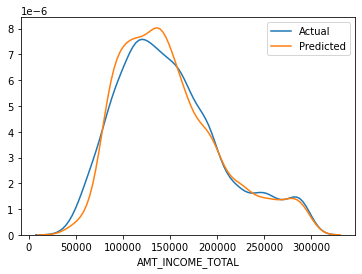

In [481]:
sns.distplot(y.AMT_INCOME_TOTAL,hist=False,label="Actual")
sns.distplot(ypipe,hist=False,label='Predicted')

In [482]:
r2_score(y,ypipe)

0.9320711242767372

### Identify optimal regularization parameter value using grid search. Then create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data. Take a screenshot for your code and the R^2 

In [485]:
RigeModel=Ridge()
parameters1= [{'alpha': [0.001,0.1,1,10]}]
parameters1

In [491]:
Grid1 = GridSearchCV(RigeModel, parameters1,cv=4)
Grid1.fit(X_Data,y)
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [492]:
Grid1.score(X_Data,y)

0.9261420756659969

### Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, identifying the regularization parameter value using grid search

In [494]:
train_X,test_X,train_y,test_Y=tts(X_Data,y,test_size=.10,random_state=20)

In [499]:
RigeModel=Ridge()
parameters1= [{'alpha': [0.001,0.1,1,10],'normalize':[True,False],'tol':[.001,.005,.09,.05,.01]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10],
  'normalize': [True, False],
  'tol': [0.001, 0.005, 0.09, 0.05, 0.01]}]

In [500]:
Grid1 = GridSearchCV(RigeModel, parameters1,cv=4)
Grid1.fit(train_X,train_y)
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

##### Accuracy on Training Set

In [502]:
Grid1.score(train_X,train_y)

0.9271299237565938

##### Accuracy on Test Set

In [504]:
Grid1.score(test_X,test_Y)

0.9169825929517919